In [803]:
import numpy as np
import pandas as pd

In [804]:
dataset = pd.read_csv("./datasets/apartment_prices.csv")

In [805]:
dataset = dataset.sample(frac=1).reset_index(drop=True) # shuffle dataset and reset index
dataset.head()

,Squaremeter,Price
0,72,363
1,76,407
2,50,215
3,93,424
4,48,228


In [806]:
dataset = dataset.to_numpy().astype(np.float32)
print(dataset.shape)

(50, 2)


In [807]:
X, y = dataset[:,0], dataset[:, 1]

In [808]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
                                                    
                                                    
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33, 1) (17, 1) (33, 1) (17, 1)
torch.Size([33, 1]) torch.Size([17, 1]) torch.Size([33, 1]) torch.Size([17, 1])


In [809]:
import matplotlib.pyplot as plt

In [810]:
import torch
import torch.nn as nn

In [811]:
from tqdm import trange

In [812]:
input_size = 1 # features
output_size = 1 # output size

model = nn.Linear(input_size, output_size)

In [813]:
class DavNet(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(DavNet, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        y_predicted = self.linear(x)
        return y_predicted
    
#model = DavNet(input_size, output_size)
model = nn.Linear(input_size, output_size)

In [814]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss: 5462.48340: 100%|██████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1257.25it/s]


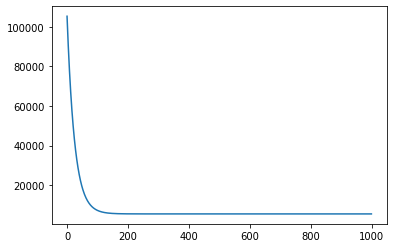

In [815]:
n_epochs = 1000
losses = []

for i in (t := trange(n_epochs)):
    y_predicted = model(X_train)   
    loss = criterion(y_predicted, y_train)   
    loss.backward()   
    optimizer.step()  
    optimizer.zero_grad()  
    losses.append(loss.item())
    
    t.set_description("loss: %.5f" % (loss.item()))
    
plt.plot(losses)

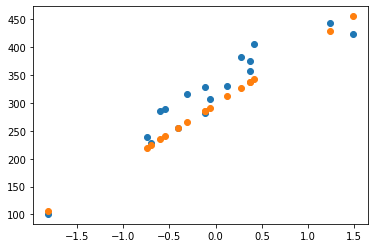

In [816]:
predicted = model(X_test).detach().numpy()

plt.scatter(X_test, y_test)
plt.scatter(X_test, predicted)